Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Ben Bitdiddle"
COLLABORATORS = "Alyssa P. Hacker"

---

In [2]:
# import plotting libraries
%matplotlib inline
import matplotlib.pyplot as plt

---
## Part A

Write a function that returns a list of numbers, such that $x_i=i^2$, for $1\leq i \leq n$. Make sure it handles the case where $n<1$ by raising a `ValueError`.

In [3]:
def squares(n):
    """Compute the squares of numbers from 1 to n, such that the 
    ith element of the returned list equals i^2.
    
    """
    if n < 1:
        raise ValueError
    s = []
    for i in range(n):
        s.append(i**2)
    return s

Your function should print `[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]` for $n=10$. Check that it does:

In [4]:
squares(10)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [5]:
"""Check that squares returns the correct output for several inputs"""
from nose.tools import assert_equal
assert_equal(squares(1), [1])
assert_equal(squares(2), [1, 4])
assert_equal(squares(10), [1, 4, 9, 16, 25, 36, 49, 64, 81, 100])
assert_equal(squares(11), [1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121])

AssertionError: Lists differ: [0] != [1]

First differing element 0:
0
1

- [0]
+ [1]

In [6]:
"""Check that squares raises an error for invalid inputs"""
from nose.tools import assert_raises
assert_raises(ValueError, squares, 0)
assert_raises(ValueError, squares, -4)

---

## Part B

Using your `squares` function, write a function that computes the sum of the squares of the numbers from 1 to $n$. Your function should call the `squares` function -- it should NOT reimplement its functionality.

In [7]:
def sum_of_squares(n):
    """Compute the sum of the squares of numbers from 1 to n."""
    total = 0
    s = squares(n)
    for i in range(len(s)):
        total += s[i]
    return total

The sum of squares from 1 to 10 should be 385. Verify that this is the answer you get:

In [8]:
sum_of_squares(10)

285

In [9]:
"""Check that sum_of_squares returns the correct answer for various inputs."""
assert_equal(sum_of_squares(1), 1)
assert_equal(sum_of_squares(2), 5)
assert_equal(sum_of_squares(10), 385)
assert_equal(sum_of_squares(11), 506)

AssertionError: 0 != 1

In [10]:
"""Check that sum_of_squares relies on squares."""
orig_squares = squares
del squares
try:
    assert_raises(NameError, sum_of_squares, 1)
except AssertionError:
    raise AssertionError("sum_of_squares does not use squares")
finally:
    squares = orig_squares

---
## Part C

Using LaTeX math notation, write out the equation that is implemented by your `sum_of_squares` function.

$\sum_{i=0}^n i^2$

---
## Part D

Create a plot of the sum of squares for $n=1$ to $n=15$. Make sure to appropriately label the $x$-axis and $y$-axis, and to give the plot a title. Set the $x$-axis limits to be 1 (minimum) and 15 (maximum).

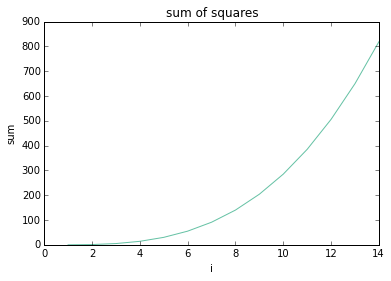

In [11]:
fig, ax = plt.subplots() # do not delete this line!
s = []
for i in range(1, 15):
    s.append(sum_of_squares(i))
ax.plot(range(1, 15), s)
ax.set_xlabel("i")
ax.set_ylabel("sum")
ax.set_title("sum of squares")

In [12]:
"""Check that the axis limits are correct."""
assert_equal(ax.get_xlim(), (1.0, 15.0))

AssertionError: Tuples differ: (0.0, 14.0) != (1.0, 15.0)

First differing element 0:
0.0
1.0

- (0.0, 14.0)
?  ^     ^

+ (1.0, 15.0)
?  ^     ^


In [13]:
"""Check that the axis labels and title are set."""
assert ax.get_xlabel() != "", "xlabel not set"
assert ax.get_ylabel() != "", "ylabel not set"
assert ax.get_title() != "", "title not set"

In [14]:
"""Check that the correct data was used."""
lines = ax.get_lines()
assert_equal(len(lines), 1)

# check the x-axis data
xdata = lines[0].get_xdata()
xdata_correct = np.arange(1, 16)
assert_equal(xdata.shape, xdata_correct.shape)
assert (xdata == xdata_correct).all()

# check the y-axis data
ydata = lines[0].get_ydata()
ydata_correct = np.array([sum_of_squares(x) for x in xdata])
assert_equal(ydata.shape, ydata_correct.shape)
assert (ydata == ydata_correct).all()

AssertionError: Tuples differ: (14,) != (15,)

First differing element 0:
14
15

- (14,)
?   ^

+ (15,)
?   ^
